<a href="https://colab.research.google.com/github/official-okello/DS_bootcamp_with_gomycode/blob/master/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Expands the input features by adding higher-degree terms like x^2, x^3, etc

In [ ]:
#import libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
#create non-linear dataset
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
Y = np.array([2, 6, 14, 28, 50, 80, 120, 170, 230, 310])

In [ ]:
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

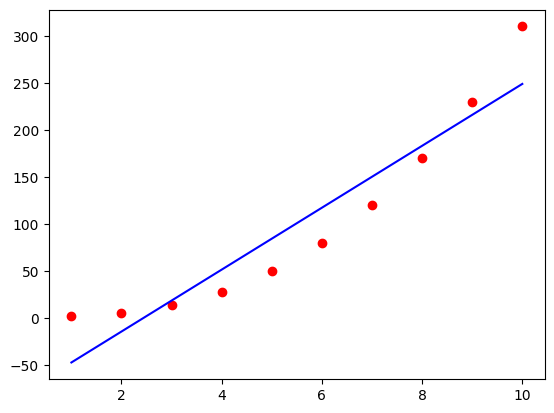

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(X, Y, color='red')
plt.plot(X, Y_pred, color='blue')

Polynomial Regression

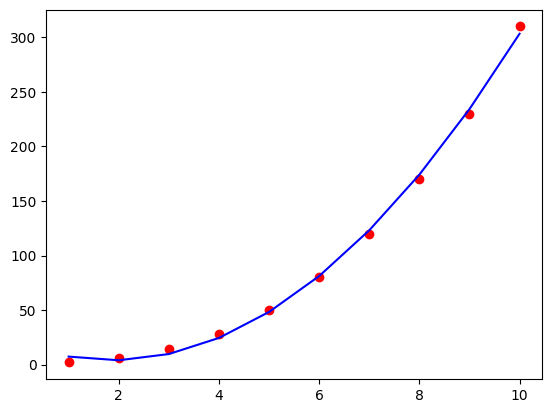

In [ ]:
#transform to include polynomial features (degree=2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

#Train
poly_model = LinearRegression()
poly_model.fit(X_poly, Y)

#Predict
Y_poly_pred = poly_model.predict(X_poly)

#Visualize
plt.scatter(X, Y, color='red')
plt.plot(X, Y_poly_pred, color='blue')

50 Startups data

In [1]:
#import libraries
import pandas as pd

In [19]:
#load dataset and check info
df = pd.read_csv('/content/50_Startups.csv')
# df.info()
# df.describe()
# df.isnull().sum()
# df.duplicated().sum()
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [20]:
#handle categorical data
# df = pd.get_dummies(df, columns=['State'])
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['State'] = le.fit_transform(df['State'])
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [25]:
#select features and target variables depending on type of regression
Y = df['Profit']
X = df.drop('Profit', axis=1)

In [38]:
#split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [39]:
#train the model
from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import PolynomialFeatures

# poly = PolynomialFeatures(degree=2)
# X_train = poly.fit_transform(X_train)
# X_test = poly.transform(X_test)
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [40]:
#make predictions
Y_pred = model.predict(X_test)

In [41]:
#evaluate model performance
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 80929465.49097767
R-squared: 0.9000614254946404


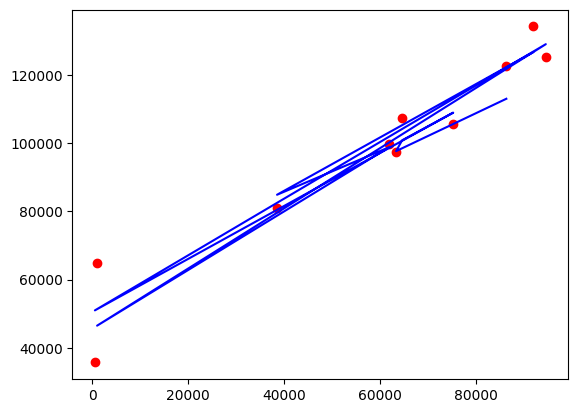

In [42]:
#visualize the regression line
import matplotlib.pyplot as plt
plt.scatter(X_test['R&D Spend'], Y_test, color='red')
plt.plot(X_test['R&D Spend'], Y_pred, color='blue')